In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import os

# 1️⃣ Load Required Libraries¶

In [57]:
# to import file
df=pd.read_csv("C:/Users/USER/Documents/Finance_Ecommerce_Dirty_Dataset_csv.csv")
print(df)

     TransactionID        Date AccountID   AccountName TransactionType  \
0         TX103251    4/3/2025    AC3973  Arjun Sharma           Debit   
1         TX101874   10/8/2024    AC8970     Dev Kumar           Debit   
2         TX103746   9/14/2024    AC3777    Amit Gupta           Debit   
3         TX105269  12/21/2024    AC9635      Ritu Roy          Refund   
4         TX100463   4/14/2024    AC1329      Raj Bose          Refund   
...            ...         ...       ...           ...             ...   
6055      TX105699  10/16/2023    AC5214   Vikram Iyer          Credit   
6056      TX102550   7/25/2025    AC8982   Anita Reddy           debit   
6057      TX100537   9/24/2023    AC5308   Rohit Kumar          Credit   
6058      TX101220   3/25/2024    AC7593    Sana Reddy          Credit   
6059      TX104271    2/3/2025    AC4810    Neha Reddy          Credit   

      Amount Currency  ExchangeRate         Balance      Merchant  ...  \
0      47.36     USD        80.6864  

# 2️⃣ Initial Dataset Checks¶

In [58]:
# preview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6060 entries, 0 to 6059
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    6057 non-null   object 
 1   Date             6060 non-null   object 
 2   AccountID        6059 non-null   object 
 3   AccountName      6059 non-null   object 
 4   TransactionType  6058 non-null   object 
 5   Amount           6059 non-null   object 
 6   Currency         6055 non-null   object 
 7   ExchangeRate     6058 non-null   float64
 8   Balance          5988 non-null   object 
 9   Merchant         6058 non-null   object 
 10  MerchantPhone    4647 non-null   float64
 11  MerchantEmail    4222 non-null   object 
 12  Category         6058 non-null   object 
 13  Subcategory      6055 non-null   object 
 14  Country          6058 non-null   object 
 15  City             6058 non-null   object 
 16  PostalCode       5742 non-null   float64
 17  CardNumber    

In [59]:
df.head()

,TransactionID,Date,AccountID,AccountName,TransactionType,Amount,Currency,ExchangeRate,Balance,Merchant,...,Subcategory,Country,City,PostalCode,CardNumber,Email,Phone,IsFraud,Notes,CustomerSince
0,TX103251,4/3/2025,AC3973,Arjun Sharma,Debit,47.36,USD,80.6864,-1714968.59,ShopEasy,...,Books,UK,Pune,153621.0,XXXX-XXXX-XXXX-4249,arjun.sharma@hotmail.com,-4.469492e+09,No,repeat purchase,16/09/2018
1,TX101874,10/8/2024,AC8970,Dev Kumar,Debit,159.55,inr,1.0000,-1162428.75,AutoZone,...,Concert,Australia,Delhi,380312.0,XXXX-XXXX-5979,dev.kumar@yahoo.com,5.882006e+09,No,cashback credited,11/7/2022
2,TX103746,9/14/2024,AC3777,Amit Gupta,Debit,2.43,GBP,102.0148,-2085783.34,BigBasket,...,Specialty,USA,Gurugram,NaN,XXXX-XXXX-2243,amit.gupta@example.com,8.832898e+08,No,cashback credited,Aug-21
3,TX105269,12/21/2024,AC9635,Ritu Roy,Refund,78.96,AED,18.1216,-2727243.49,ShopEasy,...,Restaurant,Australia,Mumbai,793747.0,XXXX-XXXX-9279,ritu.roy@hotmail.com,6.845400e+09,No,suspected fraud,2024
4,TX100463,4/14/2024,AC1329,Raj Bose,Refund,42.81,USD,78.4379,-259175.06,LocalMart,...,FastFood,USA,Mumbai,755067.0,NaN,raj.bose@hotmail.com,1.228611e+09,No,cashback credited,3/2/2023


In [60]:
df.columns

Index(['TransactionID', 'Date', 'AccountID', 'AccountName', 'TransactionType',
       'Amount', 'Currency', 'ExchangeRate', 'Balance', 'Merchant',
       'MerchantPhone', 'MerchantEmail', 'Category', 'Subcategory', 'Country',
       'City', 'PostalCode', 'CardNumber', 'Email', 'Phone', 'IsFraud',
       'Notes', 'CustomerSince'],
      dtype='object')

In [61]:
#check Duplicate
df.duplicated().sum()

np.int64(1)

In [62]:
df.isnull().sum()

TransactionID         3
Date                  0
AccountID             1
AccountName           1
TransactionType       2
Amount                1
Currency              5
ExchangeRate          2
Balance              72
Merchant              2
MerchantPhone      1413
MerchantEmail      1838
Category              2
Subcategory           5
Country               2
City                  2
PostalCode          318
CardNumber          439
Email               259
Phone               328
IsFraud              76
Notes               804
CustomerSince         2
dtype: int64

# Remove Duplicates records

In [63]:
df_without_duplicates=df.drop_duplicates() #to try later on it without duplicates

# Cleaning Each Columns

In [64]:
df['Date'] = pd. to_datetime(df['Date'],errors='coerce')

In [65]:
df.Date

0      2025-04-03
1      2024-10-08
2      2024-09-14
3      2024-12-21
4      2024-04-14
          ...    
6055   2023-10-16
6056   2025-07-25
6057   2023-09-24
6058   2024-03-25
6059   2025-02-03
Name: Date, Length: 6060, dtype: datetime64[ns]

In [66]:
# This removes anything that is not number from the amount column [] match one character^ NOT \d any digit (0-9)\. a dot .
#(-)a minus sign
df['Amount'] = df['Amount'].replace(r'[^\d\.-]','', regex=True).astype(float)


In [67]:
df.Amount

0        47.36
1       159.55
2         2.43
3        78.96
4        42.81
         ...  
6055     69.09
6056      4.94
6057     20.87
6058      7.96
6059     17.66
Name: Amount, Length: 6060, dtype: float64

In [68]:
df = df[df['Amount'].notna()]          # remove rows where Amount couldn't be parsed
df = df[df['Amount'] >= 0]      

In [69]:
# This removes anything that is not number from the amount column [] match one character^ NOT \d any digit (0-9)\. a dot .
#(-)a minus sign
df['Balance'] = df['Balance'].replace(r'[^\d\.-]','', regex=True).astype(float)


In [70]:
df.Balance

0      -1714968.59
1      -1162428.75
2      -2085783.34
3      -2727243.49
4       -259175.06
           ...    
6055   -2901016.18
6056   -1557558.39
6057    -276412.59
6058    -593859.37
6059   -2254562.37
Name: Balance, Length: 5823, dtype: float64

In [71]:
# covert to strings
cols_to_str = ['MerchantPhone', 'Phone', 'CardNumber', 'PostalCode']

for i in cols_to_str:
    df[i] = df[i].astype("string")

In [72]:
# Always drop rows where critical columns are missing
df = df.dropna(subset=['TransactionID', 'AccountID', 'AccountName', 'Amount'])

In [73]:
#fill missing values with unknown
cat_cols = ['Merchant', 'Category', 'Subcategory', 'Country', 'City', 'TransactionType']

for column in cat_cols:
    df[column] = df[column].fillna("Unknown")

In [74]:
# fill exchange rate column with midian value
df['ExchangeRate'] = df['ExchangeRate'].fillna(df['ExchangeRate'].median())

In [75]:
df.dtypes

TransactionID              object
Date               datetime64[ns]
AccountID                  object
AccountName                object
TransactionType            object
Amount                    float64
Currency                   object
ExchangeRate              float64
Balance                   float64
Merchant                   object
MerchantPhone      string[python]
MerchantEmail              object
Category                   object
Subcategory                object
Country                    object
City                       object
PostalCode         string[python]
CardNumber         string[python]
Email                      object
Phone              string[python]
IsFraud                    object
Notes                      object
CustomerSince              object
dtype: object

# Clean Merchant Column

In [76]:
# Convert to lowercase
df['Merchant'] = df['Merchant'].str.lower()

In [77]:
df['Merchant'] = df['Merchant'].fillna('Unknown Merchant')

In [78]:
# Strip whitespace
df['Merchant'] = df['Merchant'].str.strip()


In [79]:
# Remove special characters like @,#,%,& etc.
df['Merchant'] = df['Merchant'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

In [80]:
# Replace multiple spaces with a single space
df['Merchant'] = df['Merchant'].str.replace(r'\s+', ' ', regex=True)

In [81]:
# Standardize known common merchant variations
merchant_mapping = {
    'amzn': 'amazon',
    'amazon marketplace': 'amazon',
    'walmart inc': 'walmart',
    'wal mart': 'walmart',
    'mcdonalds': 'mcdonalds',
    'mc donalds': 'mcdonalds',
}

df['Merchant'] = df['Merchant'].replace(merchant_mapping)


In [82]:
# Step 8: Optional: Standardize text data (Merchant names, AccountName, etc.)
df['Merchant'] = df['Merchant'].str.strip().str.title()
df['AccountName'] = df['AccountName'].str.strip().str.title()

In [83]:
# fill strings column with unknown
cols_unknown = ['MerchantPhone', 'MerchantEmail', 'PostalCode', 'CardNumber', 'Email', 'Phone']
for col in cols_unknown:
    df[col] = df[col].fillna("Unknown")


In [84]:
# fill missing balance with 0 or forward fill
df['Balance'] = df['Balance'].fillna(method = 'ffill') # forward fill pervious balance  forward fill means pick the missing balance from th front

In [85]:
df['Currency'] = df['Currency'].fillna(df['Currency'].mode()[0])

In [86]:
# fill missing value with "not fraud"
df['IsFraud'] = df['IsFraud'].fillna("not fraud") 

In [87]:
# create a new column 'IsFraudFlag'
df['IsFraudFlag'] = df['IsFraud'].map({'Yes': 1, 'No': 0})

# fill missing values with 0(assuring missing = not fraud)
df['IsFraudFlag'] = df['IsFraudFlag'].fillna(0)
df[['IsFraud', 'IsFraudFlag']].head()

,IsFraud,IsFraudFlag
0,No,0.0
1,No,0.0
2,No,0.0
3,No,0.0
4,No,0.0


In [88]:
# fill note column with " "
df['Notes'] = df['Notes'].fillna("")

In [89]:
# drop customer since column
df = df.drop(columns=['CustomerSince'])

In [90]:
(df.head())

,TransactionID,Date,AccountID,AccountName,TransactionType,Amount,Currency,ExchangeRate,Balance,Merchant,...,Subcategory,Country,City,PostalCode,CardNumber,Email,Phone,IsFraud,Notes,IsFraudFlag
0,TX103251,2025-04-03,AC3973,Arjun Sharma,Debit,47.36,USD,80.6864,-1714968.59,Shopeasy,...,Books,UK,Pune,153621.0,XXXX-XXXX-XXXX-4249,arjun.sharma@hotmail.com,-4469491713.0,No,repeat purchase,0.0
1,TX101874,2024-10-08,AC8970,Dev Kumar,Debit,159.55,inr,1.0000,-1162428.75,Autozone,...,Concert,Australia,Delhi,380312.0,XXXX-XXXX-5979,dev.kumar@yahoo.com,5882006077.0,No,cashback credited,0.0
2,TX103746,2024-09-14,AC3777,Amit Gupta,Debit,2.43,GBP,102.0148,-2085783.34,Bigbasket,...,Specialty,USA,Gurugram,Unknown,XXXX-XXXX-2243,amit.gupta@example.com,883289751.0,No,cashback credited,0.0
3,TX105269,2024-12-21,AC9635,Ritu Roy,Refund,78.96,AED,18.1216,-2727243.49,Shopeasy,...,Restaurant,Australia,Mumbai,793747.0,XXXX-XXXX-9279,ritu.roy@hotmail.com,6845399861.0,No,suspected fraud,0.0
4,TX100463,2024-04-14,AC1329,Raj Bose,Refund,42.81,USD,78.4379,-259175.06,Localmart,...,FastFood,USA,Mumbai,755067.0,Unknown,raj.bose@hotmail.com,1228611124.0,No,cashback credited,0.0


In [91]:
df.isnull().sum()

TransactionID      0
Date               0
AccountID          0
AccountName        0
TransactionType    0
Amount             0
Currency           0
ExchangeRate       0
Balance            0
Merchant           0
MerchantPhone      0
MerchantEmail      0
Category           0
Subcategory        0
Country            0
City               0
PostalCode         0
CardNumber         0
Email              0
Phone              0
IsFraud            0
Notes              0
IsFraudFlag        0
dtype: int64

In [92]:
# Fill missing Merchant/Category with 'Unknown' (but keep track of counts)
missing_merchant_before = df['Merchant'].isna().sum()
missing_category_before = df['Category'].isna().sum()
df['Merchant'] = df['Merchant'].fillna('Unknown')
df['Category'] = df['Category'].fillna('Unknown')

# MERCHANT ANALYSIS
#Transaction counts per merchant

In [93]:

merchant_counts = df['Merchant'].value_counts()
merchant_counts.to_csv("merchant_transaction_counts.csv")



In [94]:
# Revenue per merchant
merchant_revenue = df.groupby('Merchant')['Amount'].sum().sort_values(ascending=False)
merchant_revenue.to_csv('merchant_revenue.csv')

In [95]:
# Top 10 merchants by count and revenue
top10_by_count = merchant_counts.head(10)
top10_by_revenue = merchant_revenue.head(10)


#  CATEGORY ANALYSIS

In [96]:
category_counts = df['Category'].value_counts()
category_counts.to_csv( 'category_transaction_counts.csv')

category_revenue = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
category_revenue.to_csv( 'category_revenue.csv')


In [97]:
# 8. TIME-SERIES: monthly revenue by category & top merchants
# -----------------------
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str).fillna('Unknown')  # safe string
monthly_cat_revenue = df.groupby(['YearMonth','Category'])['Amount'].sum().reset_index()
monthly_cat_revenue.to_csv('monthly_category_revenue.csv', index=False)



In [98]:
# Group merchant × category counts
merchant_category_counts = (
    df.groupby(['Merchant', 'TransactionType'])
    .size()
    .reset_index(name='Count'))
# Pick top N merchants
topN = 20
top_merchants = (
    merchant_category_counts.groupby('Merchant')['Count']
    .sum()
    .sort_values(ascending=False)
    .head(topN)
    .index)

# Filter for top merchants only
filtered_data = merchant_category_counts[
    merchant_category_counts['Merchant'].isin(top_merchants)
]

    
# Convert to a matrix for heatmap
heatmap_data = filtered_data.pivot(
    index='Merchant',
    columns='TransactionType',
    values='Count'
).fillna(0)

In [99]:
# For top merchants time series (top by revenue overall)
top_merchants = merchant_revenue.head(6).index.tolist()
monthly_merchant_revenue = (df[df['Merchant'].isin(top_merchants)]
                            .groupby(['YearMonth','Merchant'])['Amount'].sum().reset_index())
monthly_merchant_revenue.to_csv( 'monthly_top_merchants_revenue.csv', index=False)

In [100]:
 # Transaction volume
                
category_volume = df['Category'].value_counts().reset_index()
category_volume.columns = ['Category', 'TransactionCount']

# Revenue
category_revenue = df.groupby('Category')['Amount'].sum().reset_index()

# Merge for scatter plot
category_summary = pd.merge(category_volume, category_revenue, on='Category')



# VISUALIZATIONS

# A: Top 10 merchants by transaction count

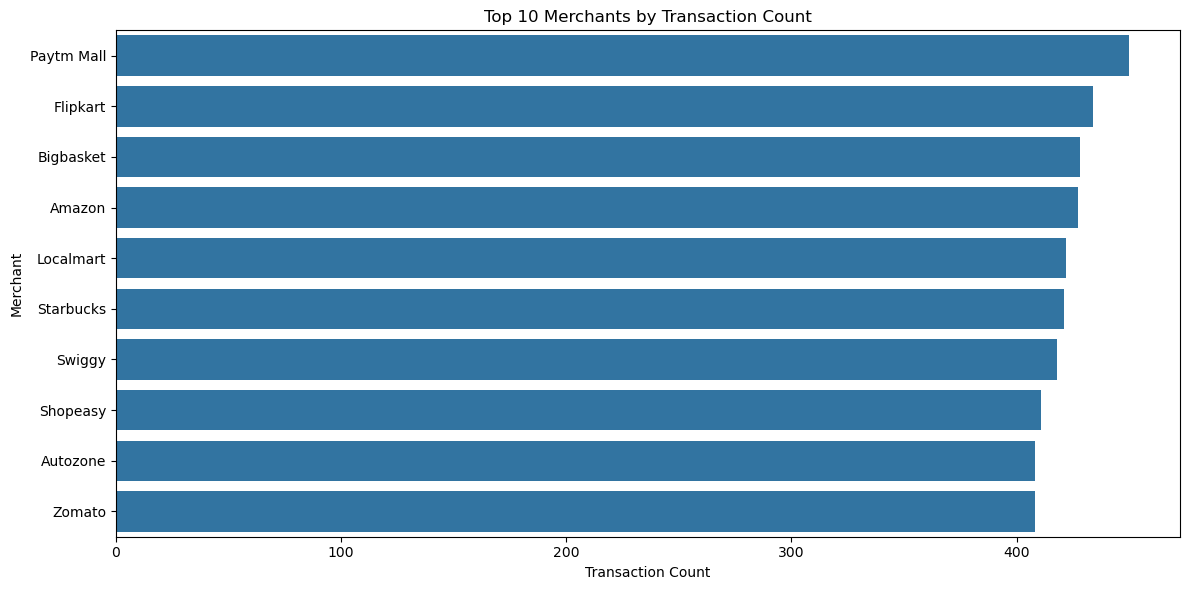

In [101]:
# A: Top 10 merchants by transaction count
plt.figure(figsize=(12,6))
sns.barplot(x=top10_by_count.values, y=top10_by_count.index)
plt.title('Top 10 Merchants by Transaction Count')
plt.xlabel('Transaction Count'); plt.ylabel('Merchant')
plt.tight_layout()
plt.savefig( 'top10_merchants_by_count.png', dpi=150)
plt.show()

# B: Top 10 merchants by revenue



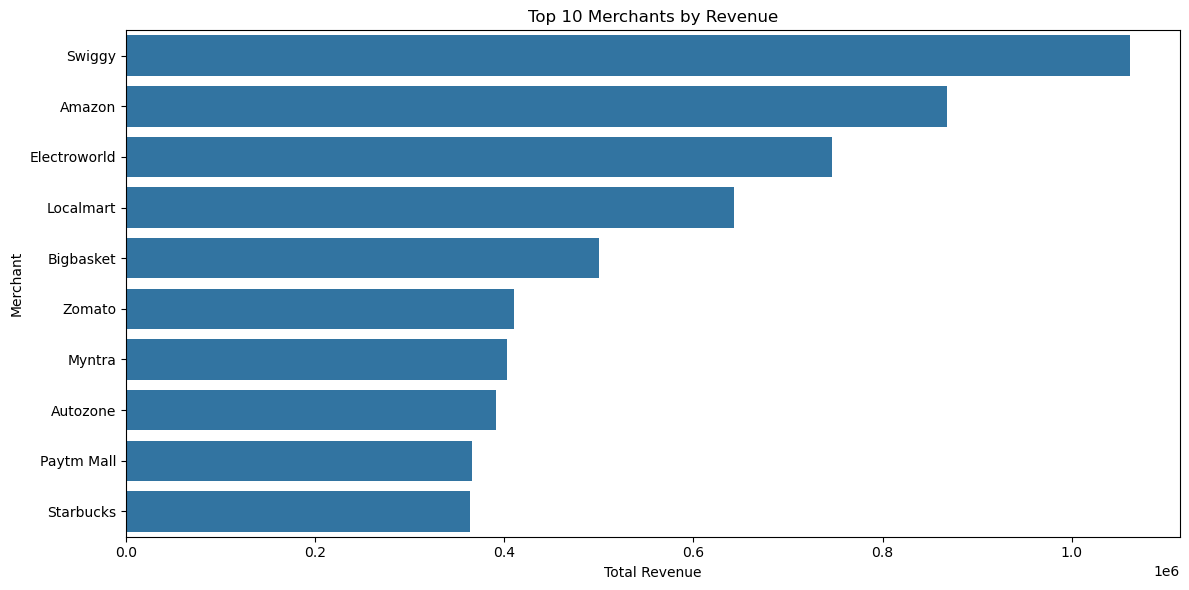

In [102]:
# B: Top 10 merchants by revenue
plt.figure(figsize=(12,6))
sns.barplot(x=top10_by_revenue.values, y=top10_by_revenue.index)
plt.title('Top 10 Merchants by Revenue')
plt.xlabel('Total Revenue'); plt.ylabel('Merchant')
plt.tight_layout()
plt.savefig('top10_merchants_by_revenue.png', dpi=150)
plt.show()


# C: Category distribution (counts)

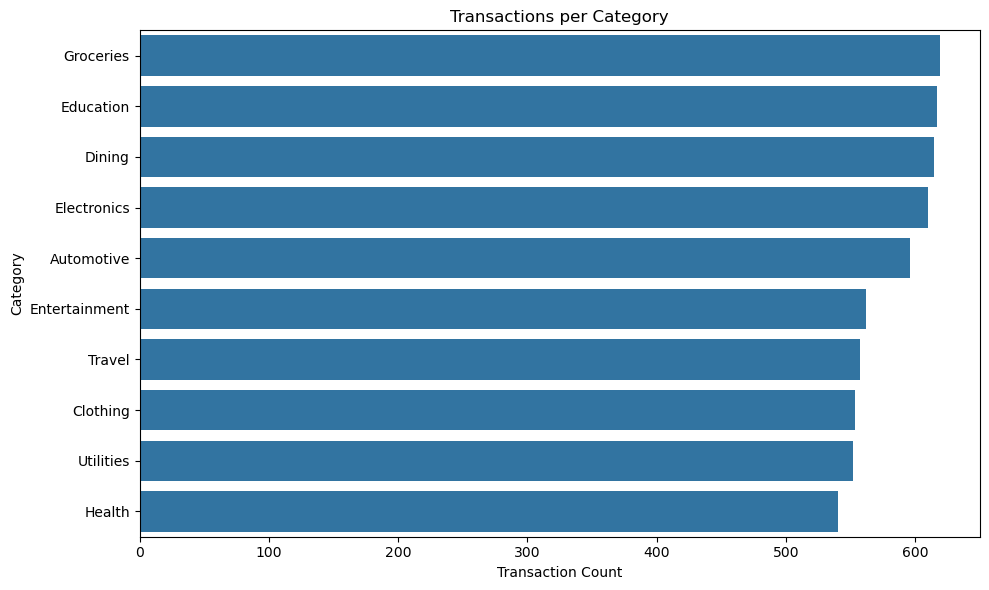

In [103]:
# C: Category distribution (counts)
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Transactions per Category')
plt.xlabel('Transaction Count'); plt.ylabel('Category')
plt.tight_layout()
plt.savefig( 'category_transaction_counts.png', dpi=150)
plt.show()


# D: Category revenue


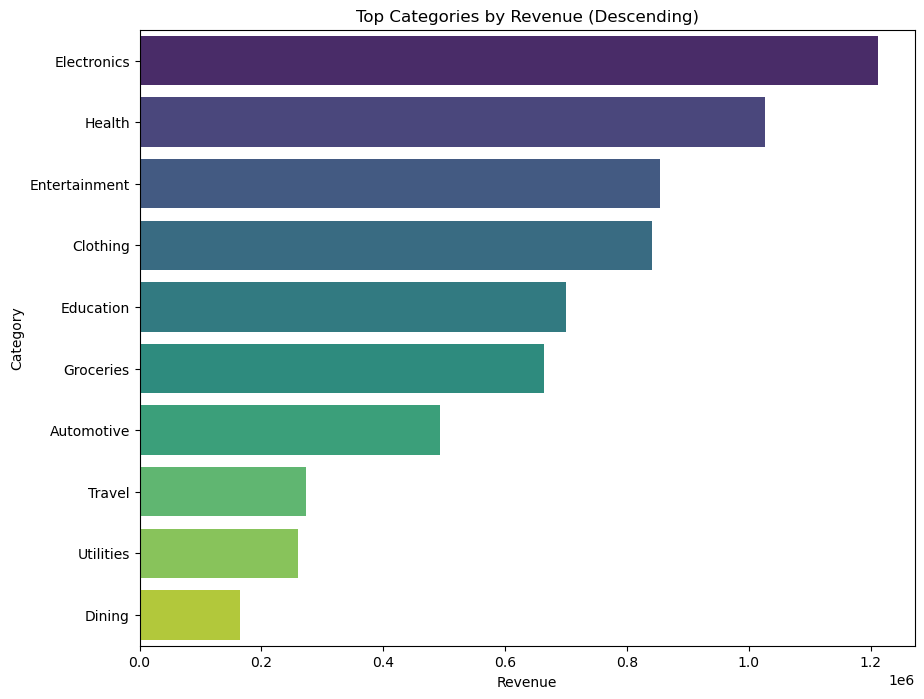

In [109]:
# D: Category revenue

# Aggregate revenue per category
category_revenue = df.groupby('Category')['Amount'].sum()

# Top 15 categories by revenue, descending
top_cats_desc = category_revenue.sort_values(ascending=False).head(15).reset_index()
top_cats_desc.columns = ['Category', 'Revenue']

# Plot descending
plt.figure(figsize=(10,8))
sns.barplot(data=top_cats_desc, x='Revenue', y='Category', palette='viridis')
plt.title('Top Categories by Revenue (Descending)')
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.show()




#  E: Bar Chart: Transaction Volume

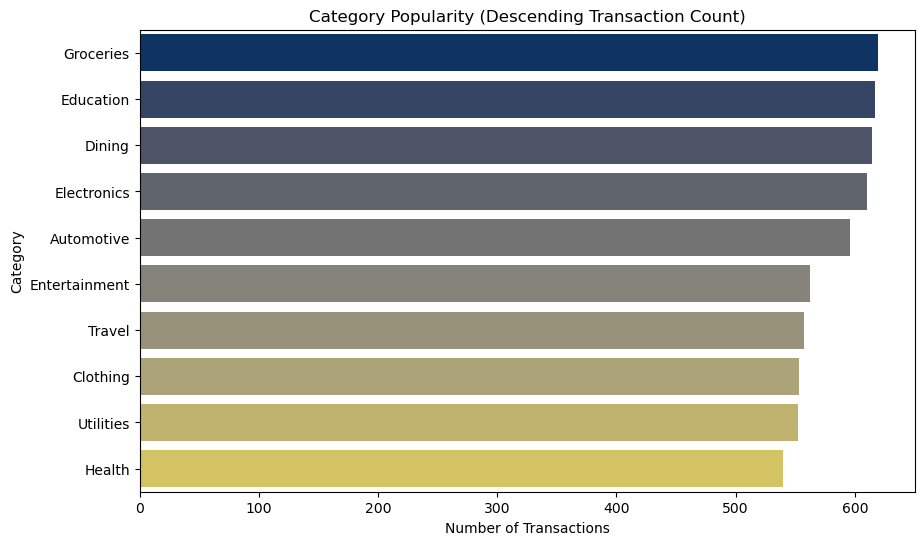

In [112]:


# Aggregate transaction counts per category
category_volume = df.groupby('Category').size().reset_index(name='TransactionCount')

# Sort descending
category_volume_desc = category_volume.sort_values(by='TransactionCount', ascending=False).head(15)

# Plot descending
plt.figure(figsize=(10,6))
sns.barplot(x='TransactionCount', y='Category', data=category_volume_desc, palette='cividis')
plt.title('Category Popularity (Descending Transaction Count)')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.show()


# F. Scatter Plot: Revenue vs Volume

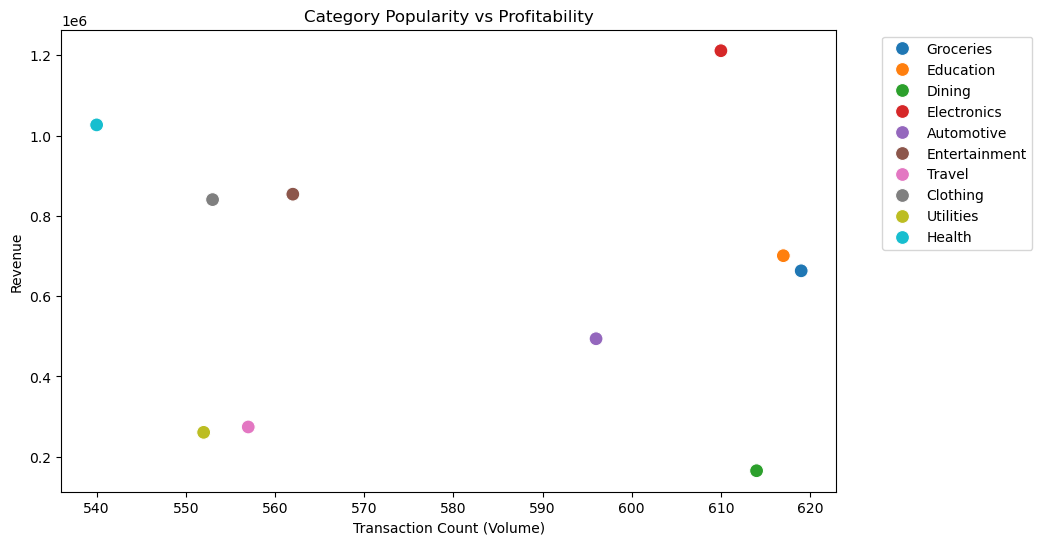

In [113]:
# ---- C. Scatter Plot: Revenue vs Volume ----
plt.figure(figsize=(10,6))
sns.scatterplot(x='TransactionCount', y='Amount', data=category_summary, hue='Category', s=100)
plt.title('Category Popularity vs Profitability')
plt.xlabel('Transaction Count (Volume)')
plt.ylabel('Revenue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# G: Heatmap merchant x category 

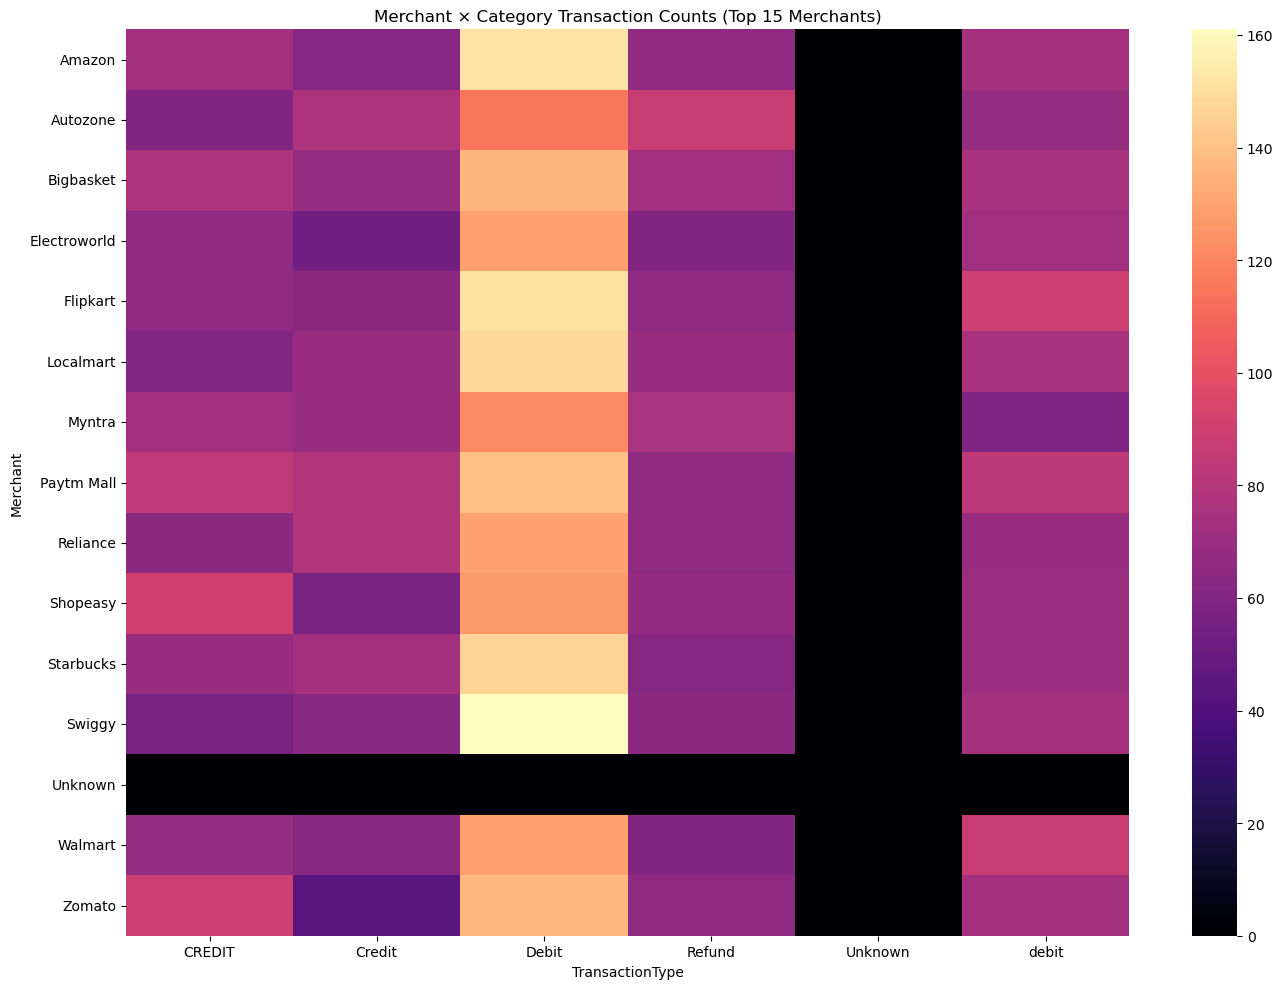

In [114]:
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=False, cmap="magma"
)
plt.title(f"Merchant × Category Transaction Counts (Top {heatmap_data.shape[0]} Merchants)")
plt.tight_layout()
plt.show()


# H: Monthly revenue for top merchants



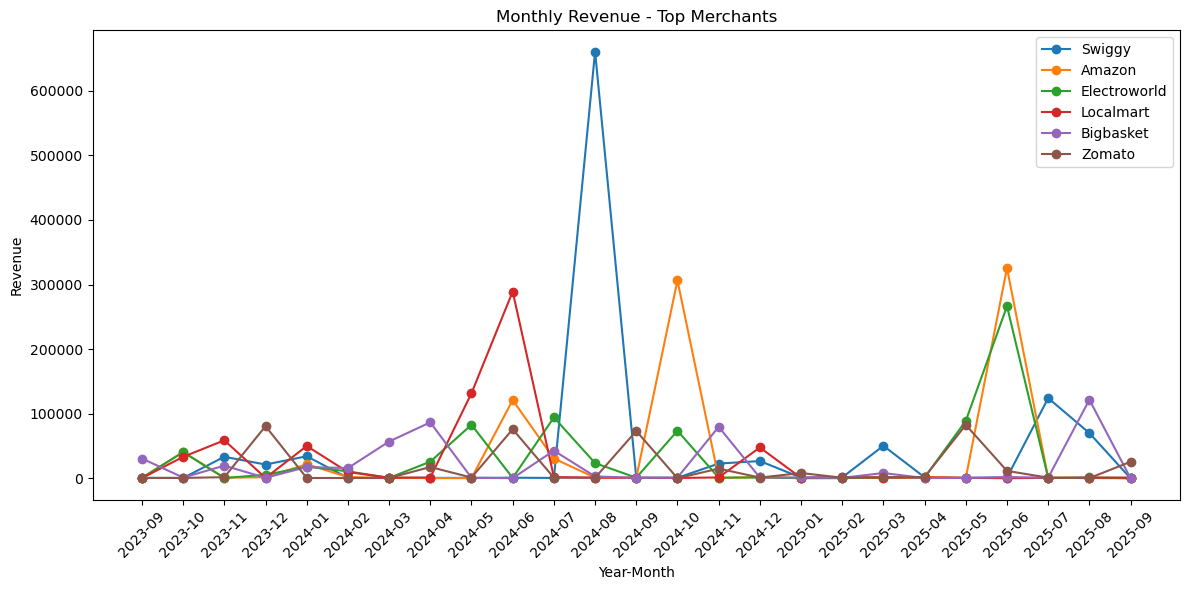

In [115]:
# F: Monthly revenue for top merchants (line plot)
if not monthly_merchant_revenue.empty:
    plt.figure(figsize=(12,6))
    for m in top_merchants:
        subset = monthly_merchant_revenue[monthly_merchant_revenue['Merchant']==m]
        plt.plot(subset['YearMonth'], subset['Amount'], marker='o', label=m)
    plt.xticks(rotation=45); plt.legend(); plt.title('Monthly Revenue - Top Merchants')
    plt.ylabel('Revenue'); plt.xlabel('Year-Month')
    plt.tight_layout()
    plt.savefig( 'monthly_revenue_top_merchants.png', dpi=150)
    plt.show()